<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:35%"><img src='https://mma.prnewswire.com/media/1860917/NTUC_LHUB_Logo.jpg' style="width: 350px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Project 2 - Healthcare - Predictive Analytics</h1><h2>A Data Analysis using Python -Exploratory Data Analysis </h2><h3></h3></th>
    </tr>
</table>

# 1. Introduction

<font color="blue">Business Understanding:

<font color="blue">As a healthcare company, we want to identify the customer segment that has high risk of heart disease, so that we can provide the targeted solutions or services to this group of customer. This approach would be more efficient in terms of cost and resources compared to mass marketing approach.

<font color="blue">Based on the available customer database, we will clean the data and look for the information that is useful to build our prediction model. Then by using our prediction model, the marketing team can filter down customers who are likely in need of our solutions and services.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cardio = pd.read_csv('cardio_data.csv') #Load dataset
cardio_backup = cardio.copy() #Create a backup copy of the DataFrame
print('This dataset has {} rows and {} columns.'.format(cardio.shape[0],cardio.shape[1]))

This dataset has 70000 rows and 16 columns.


In [3]:
cardio.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


<font color="blue">This dataset gives information about the influence of various factors on the heart disease. Column description is as below.

|Column Name|Description|Type|Unit|
|-----------|-----------|----|----|
|date|The date on which examination was done.|DATE|-|
|country|The country name of the patient.|STRING|-|
|id|The unique ID of the patient.|INT|-|
|active|The physical activity of the patient.|BINARY|-|
|age|The age of the patient.|INT|DAYS|
|alco|Alcohol intake.|BINARY|-|
|ap_hi|Systolic blood pressure.|INT|-|
|ap-lo|Diastolic blood pressure.|INT|-|
|cholesterol|Cholesterol level of the patient.|INT|-|
|gender|The gender of the patient.|STRING|-|
|gluc|Glucose level of the patient.|INT|-|
|height|Height of the patient.|INT|CM|
|occupation|Occupation of the patient|STRING|-|
|smoke|Presence of smoking|BINARY|-|
|weight|Weight of the patient.|FLOAT|KG|
|disease|Presence of disease (Target Variable)|BINARY|-|

# 2. Data Exploration

In [4]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


<font color="blue">All data types for each column is correct except for 'date'.

In [5]:
cardio.isnull().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

<font color="blue">There is no missing data for all columns.

<font color="blue">The 'age' column is in the unit of 'days', we will convert to the unit in 'years'.

In [6]:
cardio['age(yr)']=cardio['age']/365
cardio['age(yr)'] = cardio['age(yr)'].astype('int64')
cardio.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age(yr)
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0,50
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1,55
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1,51
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1,48
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0,47


<font color="blue">'date' column will be removed as it does not have any influence to heart disease. We will also remove 'age' column that has been replaced by age(yr).

In [7]:
cardio.drop(['date','age'],axis=1,inplace=True)
cardio.head()

,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age(yr)
0,Indonesia,0,1,0,110,80,1,2,1,168,Architect,0,62.0,0,50
1,Malaysia,1,1,0,140,90,3,1,1,156,Accountant,0,85.0,1,55
2,Indonesia,2,0,0,130,70,3,1,1,165,Chef,0,64.0,1,51
3,Singapore,3,1,0,150,100,1,2,1,169,Lawyer,0,82.0,1,48
4,Singapore,4,0,0,100,60,1,1,1,156,Architect,0,56.0,0,47


In [8]:
cardio.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,70000,4,Singapore,17671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,70000.0,NaN,NaN,NaN,49972.4199,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
active,70000.0,NaN,NaN,NaN,0.803729,0.397179,0.0,1.0,1.0,1.0,1.0
alco,70000.0,NaN,NaN,NaN,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0
ap_hi,70000.0,NaN,NaN,NaN,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,NaN,NaN,NaN,96.630414,188.47253,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,NaN,NaN,NaN,1.366871,0.68025,1.0,1.0,1.0,2.0,3.0
gender,70000.0,NaN,NaN,NaN,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
gluc,70000.0,NaN,NaN,NaN,1.226457,0.57227,1.0,1.0,1.0,1.0,3.0
height,70000.0,NaN,NaN,NaN,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0


<font color="blue">There are 4 countries and 9 occupations in this dataset, with Singapore and Nurse having highest frequency.

In [9]:
cardio['country'].value_counts()

country
Singapore    17671
Indonesia    17501
Malaysia     17426
India        17402
Name: count, dtype: int64

In [10]:
cardio['occupation'].value_counts()

occupation
Nurse         7905
Accountant    7879
Architect     7869
Others        7813
Lawyer        7753
Chef          7723
Engineer      7707
Teacher       7683
Doctor        7668
Name: count, dtype: int64

<font color="blue">We confirmed there is no wrong data labels for 'country' and 'occupation' columns.

([<matplotlib.axis.XTick at 0x214b18bd950>,
 [Text(0, 0, 'No heart disease'), Text(1, 0, 'Has heart disease')])

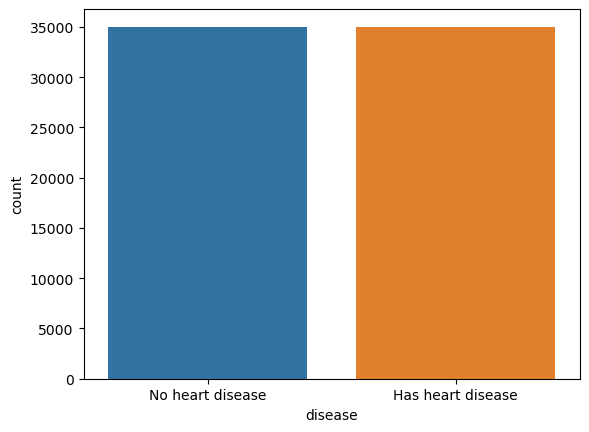

In [11]:
sns.countplot(x='disease',data=cardio)
plt.xticks([0,1],['No heart disease','Has heart disease'])

<font color="blue">The chart shows that population of disease and no disease are same. This indicates the data given may not be real world data or might have been adjusted. 

In [12]:
cardio['disease'].value_counts()

disease
0    35021
1    34979
Name: count, dtype: int64

### 2.1 Numeric Data

In [13]:
cardio.describe().T #check numeric data for outliers

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
active,70000.0,0.803729,0.397179,0.0,1.00,1.0,1.00,1.0
alco,70000.0,0.053771,0.225568,0.0,0.00,0.0,0.00,1.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


<font color="blue">We observed there are negative values for blood presure, and the maximum values of blood pressure are not realistic. For adult with age between 29 to 64, the minimum and maximum values of height and weight are either too extreme or unrealistic.

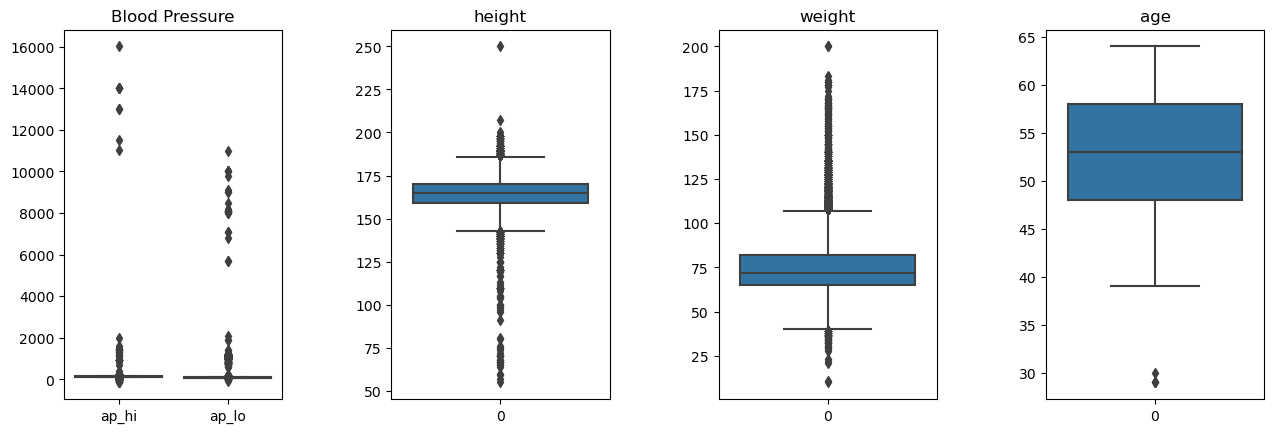

In [14]:
plt.subplot(1,4,1)
sns.boxplot(data=cardio[['ap_hi','ap_lo']])
plt.title('Blood Pressure')
plt.subplot(1,4,2)
sns.boxplot(data=cardio['height'])
plt.title('height')
plt.subplot(1,4,3)
sns.boxplot(data=cardio['weight'])
plt.title('weight')
plt.subplot(1,4,4)
sns.boxplot(data=cardio['age(yr)'])
plt.title('age')
plt.subplots_adjust(right=2,wspace=0.5)
plt.show()

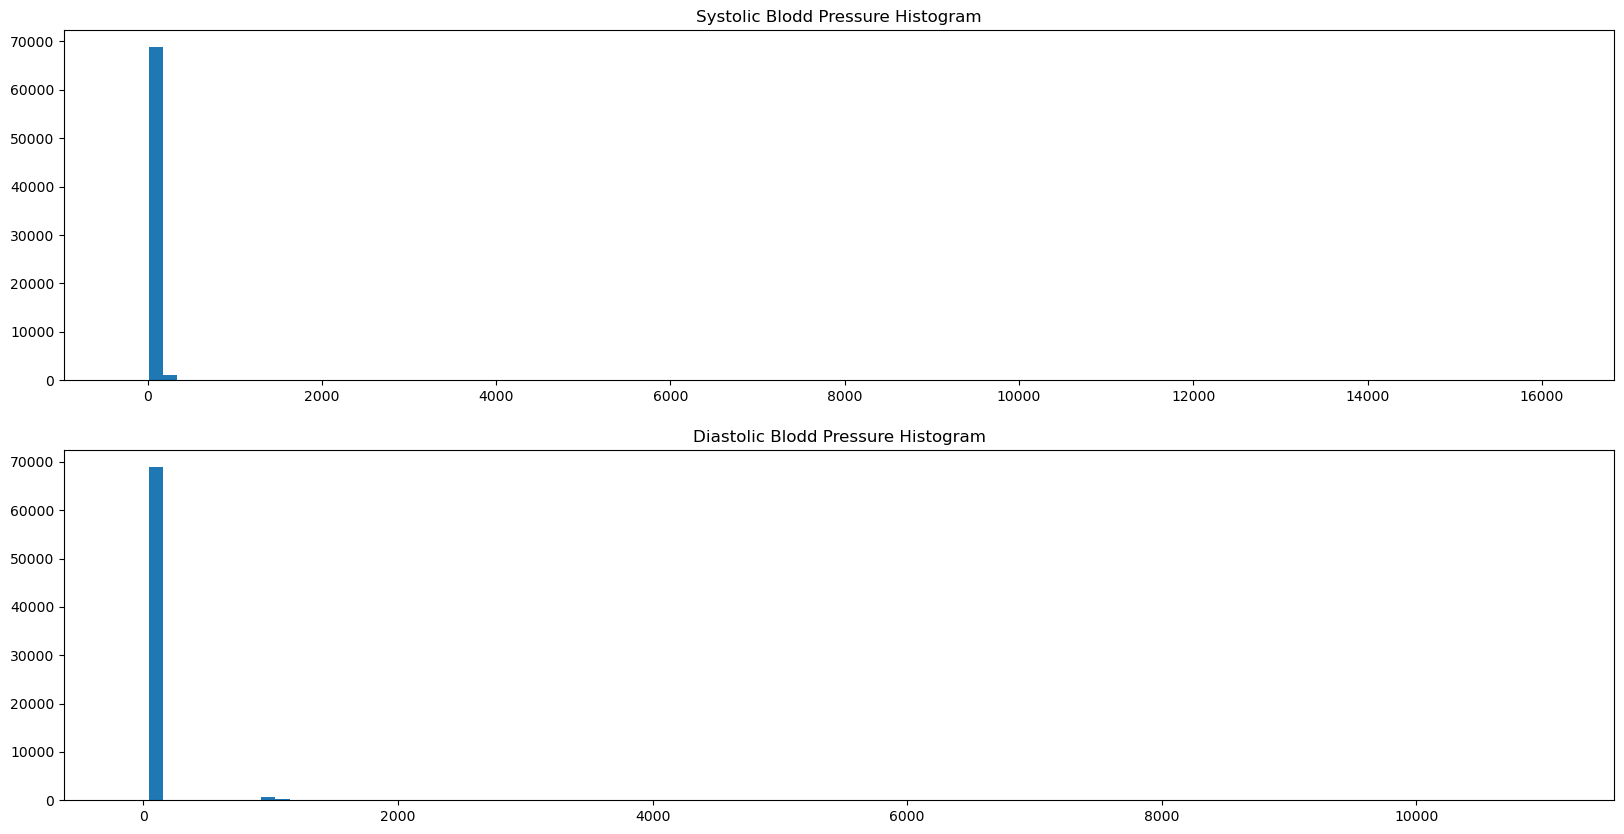

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.hist(cardio['ap_hi'],bins=100)
plt.title('Systolic Blodd Pressure Histogram')
plt.subplot(2,1,2)
plt.hist(cardio['ap_lo'],bins=100)
plt.title('Diastolic Blodd Pressure Histogram')
plt.subplots_adjust(hspace=0.2)
plt.show()

<font color="blue">From boxplot and histogram, we observed anomalies or wrong data input for the numeric data. We will remove the top and bottom 2.5% of the records for 'ap_hi', 'ap_lo', 'height', and 'weight'.

In [16]:
cardio.drop(cardio[(cardio['height'] > cardio['height'].quantile(0.975)) | (cardio['height'] < cardio['height'].quantile(0.025))].index,inplace=True)
cardio.drop(cardio[(cardio['weight'] > cardio['weight'].quantile(0.975)) | (cardio['weight'] < cardio['weight'].quantile(0.025))].index,inplace=True)
cardio.drop(cardio[(cardio['ap_hi'] > cardio['ap_hi'].quantile(0.975)) | (cardio['ap_hi'] < cardio['ap_hi'].quantile(0.025))].index,inplace=True)
cardio.drop(cardio[(cardio['ap_lo'] > cardio['ap_lo'].quantile(0.975)) | (cardio['ap_lo'] < cardio['ap_lo'].quantile(0.025))].index,inplace=True)

<font color="blue">After removing outliers, we make sure there is no more illogical data where diastolic blood pressure is higher than systolic blood pressure.

In [17]:
cardio[cardio['ap_lo']>cardio['ap_hi']].shape[0]

0

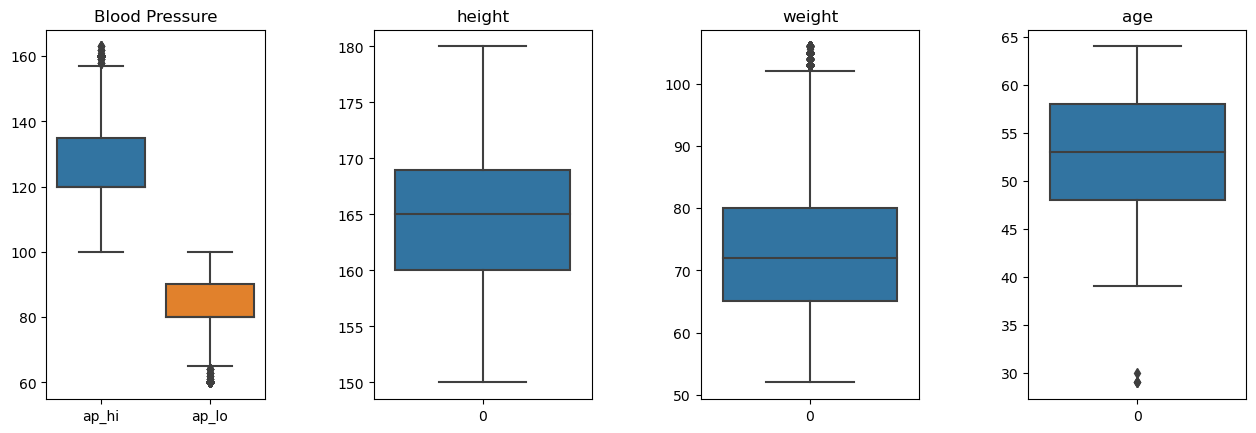

In [18]:
plt.subplot(1,4,1)
sns.boxplot(data=cardio[['ap_hi','ap_lo']])
plt.title('Blood Pressure')
plt.subplot(1,4,2)
sns.boxplot(data=cardio['height'])
plt.title('height')
plt.subplot(1,4,3)
sns.boxplot(data=cardio['weight'])
plt.title('weight')
plt.subplot(1,4,4)
sns.boxplot(data=cardio['age(yr)'])
plt.title('age')
plt.subplots_adjust(right=2,wspace=0.5)
plt.show()

In [19]:
cardio.shape

(60142, 15)

<font color="blue">The replot of boxplot shows most outliers are removed. After cleaning numerical data, we have 60142 rows.

# 3. Finding Relation

### 3.1 Numeric

<font color="blue">To find relationship between numerical features and categorial target:

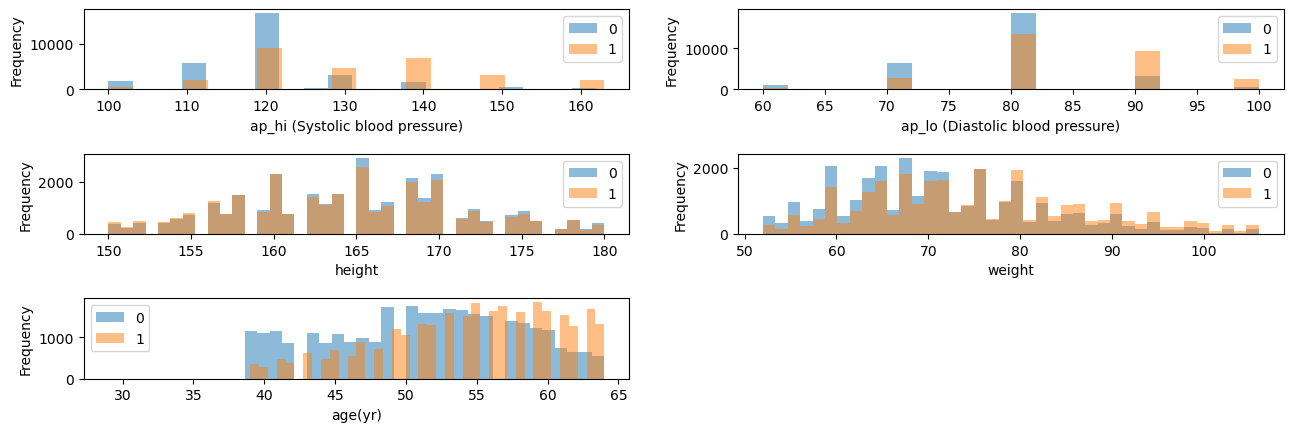

In [20]:
plt.subplot(3,2,1)
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['ap_hi'], label=str(category), alpha=0.5, bins=20)
plt.legend()
plt.xlabel('ap_hi (Systolic blood pressure)')
plt.ylabel('Frequency')
plt.subplot(3,2,2)
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['ap_lo'], label=str(category), alpha=0.5, bins=20)
plt.legend()
plt.xlabel('ap_lo (Diastolic blood pressure)')
plt.ylabel('Frequency')
plt.subplot(3,2,3)
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['height'], label=str(category), alpha=0.5, bins=40)
plt.legend()
plt.xlabel('height')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['weight'], label=str(category), alpha=0.5, bins=40)
plt.legend()
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.subplot(3,2,5)
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['age(yr)'], label=str(category), alpha=0.5, bins=40)
plt.legend()
plt.xlabel('age(yr)')
plt.ylabel('Frequency')
plt.subplots_adjust(right=2,wspace=0.2,hspace=0.8)
plt.show()

<font color="blue">We observe apparent trend for 'ap_hi' and 'ap_low'. At low pressure, disease frequency is lower than no disease. At high pressure, disease frequency is higher than no disease. We may try to use 'pulse pressure' and 'Mean Arterial Pressure (MAP)' as more meaningful features to represent the two features.

<font color="blue">On the other hand, while the 'weight' shows indication of higher weight has higher number of disease, the 'height' gives no indication. In this case, we may try to use Body Mass Index (BMI) to better represent these two features.

<font color="blue">For 'age', we can observe as age increases, there is higher frequency of disease, and lower frequency of no disease.

Text(0, 0.5, 'Frequency')

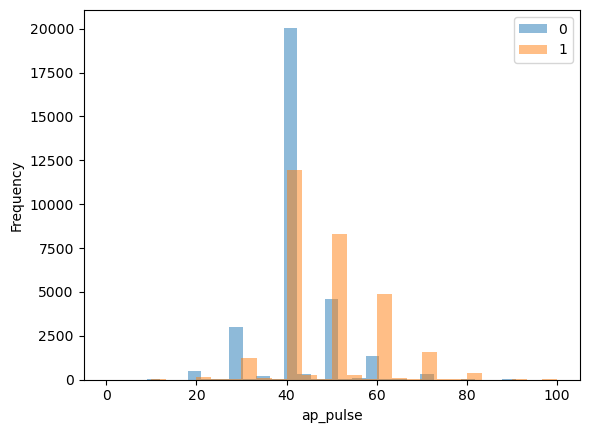

In [21]:
cardio['ap_pulse'] = cardio['ap_hi']-cardio['ap_lo']
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['ap_pulse'], label=str(category), alpha=0.5, bins=30)
plt.legend()
plt.xlabel('ap_pulse')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

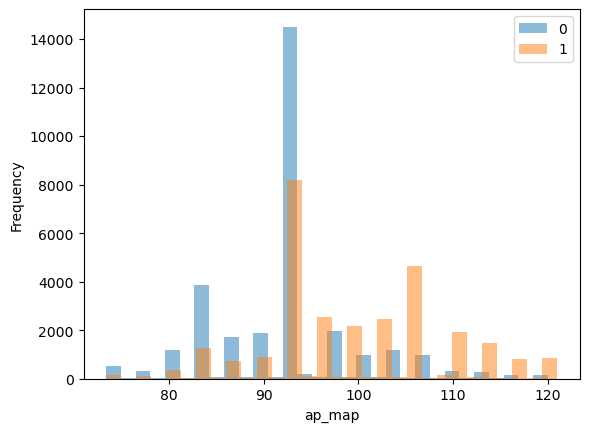

In [22]:
cardio['ap_map'] = (cardio['ap_hi'] + (2*cardio['ap_lo']))/3
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['ap_map'], label=str(category), alpha=0.5, bins=30)
plt.legend()
plt.xlabel('ap_map')
plt.ylabel('Frequency')

In [23]:
cardio = cardio.drop(['ap_hi','ap_lo'],axis=1)
cardio.head(2)

,country,id,active,alco,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age(yr),ap_pulse,ap_map
0,Indonesia,0,1,0,1,2,1,168,Architect,0,62.0,0,50,30,90.000000
1,Malaysia,1,1,0,3,1,1,156,Accountant,0,85.0,1,55,50,106.666667


<font color="blue">Both pulse pressure and mean arterial pressuredistribution shows the trend of higher the pulse pressure, higher the ratio of disease to no disease, implying pulse pressure and mean arterial pressure are good markers for heart disease. Hence we will replace 'ap_hi' and 'ap_lo' with 'ap_pulse'.

In [24]:
cardio['BMI']= round(cardio['weight']/((cardio['height']/100)**2),2)
cardio.head(2)

,country,id,active,alco,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age(yr),ap_pulse,ap_map,BMI
0,Indonesia,0,1,0,1,2,1,168,Architect,0,62.0,0,50,30,90.000000,21.97
1,Malaysia,1,1,0,3,1,1,156,Accountant,0,85.0,1,55,50,106.666667,34.93


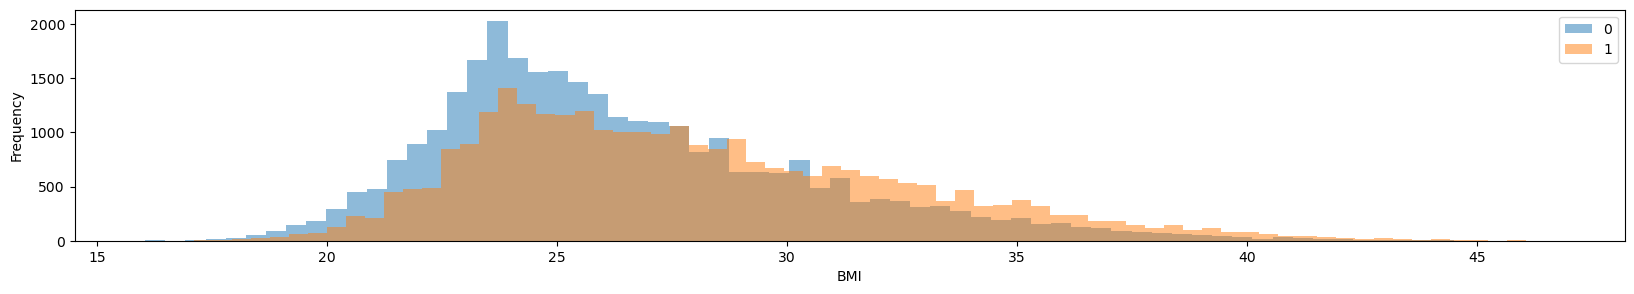

In [25]:
plt.figure(figsize=(20,3))
for category in cardio['disease'].unique():
    plt.hist(cardio[cardio['disease'] == category]['BMI'], label=str(category), alpha=0.5, bins=70)
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<font color="blue">'BMI' shows the trend higher the BMI, higher the ratio of disease to no disease. Hence we will use 'BMI' as the marker and drop 'height' and 'weight'.

In [26]:
cardio = cardio.drop(['height','weight'],axis=1)
cardio.head(2)

,country,id,active,alco,cholesterol,gender,gluc,occupation,smoke,disease,age(yr),ap_pulse,ap_map,BMI
0,Indonesia,0,1,0,1,2,1,Architect,0,0,50,30,90.000000,21.97
1,Malaysia,1,1,0,3,1,1,Accountant,0,1,55,50,106.666667,34.93


<font color="blue">Numerical features are converted into categorical features to prepare for categorical clustering later.

In [27]:
cardio['BMI'] = pd.cut(cardio['BMI'], bins=6, labels=range(6), right=True, include_lowest=True)
cardio['ap_pulse'] = pd.cut(cardio['ap_pulse'], bins=6, labels=range(6), right=True, include_lowest=True)
cardio['ap_map'] = pd.cut(cardio['ap_map'], bins=6, labels=range(6), right=True, include_lowest=True)
cardio['age_group'] = pd.cut(cardio['age(yr)'], bins=7, labels=range(7), include_lowest=True,right=True)

In [28]:
cardio.drop(['age(yr)'], axis=1, inplace=True)

In [29]:
cardio.head(5)

,country,id,active,alco,cholesterol,gender,gluc,occupation,smoke,disease,ap_pulse,ap_map,BMI,age_group
0,Indonesia,0,1,0,1,2,1,Architect,0,0,1,2,1,4
1,Malaysia,1,1,0,3,1,1,Accountant,0,1,2,4,3,5
2,Indonesia,2,0,0,3,1,1,Chef,0,1,3,2,1,4
3,Singapore,3,1,0,1,2,1,Lawyer,0,1,2,5,2,3
4,Singapore,4,0,0,1,1,1,Architect,0,0,2,0,1,3


### 3.2 Categorical

<font color="blue">To find relationship between categorical features and categorical target:

In [30]:
cardio.columns

Index(['country', 'id', 'active', 'alco', 'cholesterol', 'gender', 'gluc',
       'occupation', 'smoke', 'disease', 'ap_pulse', 'ap_map', 'BMI',
       'age_group'],
      dtype='object')

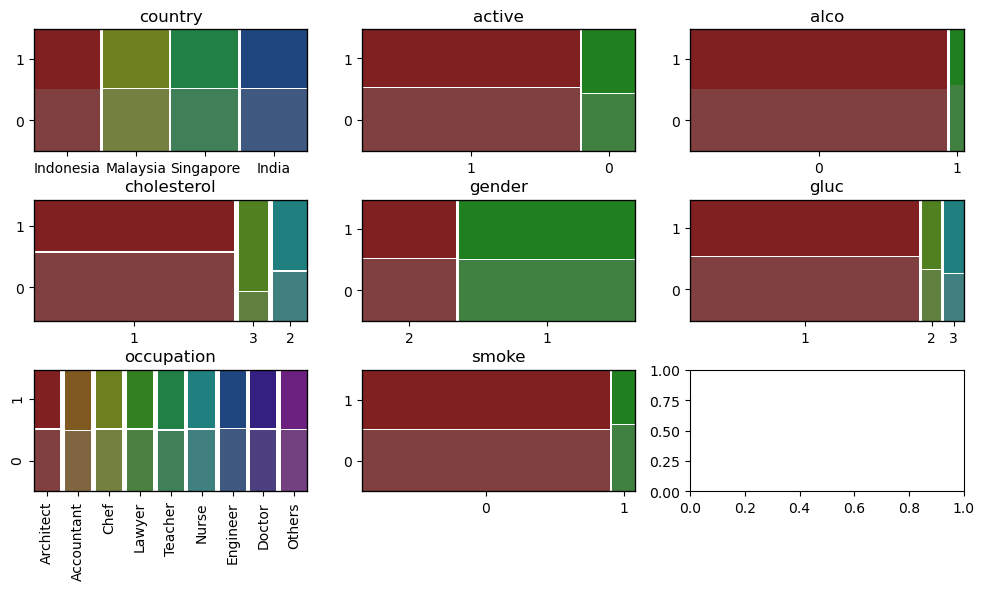

In [31]:
from statsmodels.graphics.mosaicplot import mosaic
fig, axes = plt.subplots(3,3,figsize=(12,6))
mosaic(cardio,['country','disease'], ax=axes[0,0],title='country', labelizer=lambda _:"",gap=0.01)
mosaic(cardio,['active','disease'], ax=axes[0,1],title='active', labelizer=lambda _:"",gap=0.01)
mosaic(cardio,['alco','disease'], ax=axes[0,2],title='alco', labelizer=lambda _:"",gap=0.01)
mosaic(cardio,['cholesterol','disease'], ax=axes[1,0],title='cholesterol', labelizer=lambda _:"",gap=0.02)
mosaic(cardio,['gender','disease'], ax=axes[1,1],title='gender', labelizer=lambda _:"",gap=0.01)
mosaic(cardio,['gluc','disease'], ax=axes[1,2],title='gluc', labelizer=lambda _:"",gap=0.01)
mosaic(cardio,['occupation','disease'], ax=axes[2,0],title ='occupation', labelizer=lambda _:"",label_rotation=90,gap=0.02)
mosaic(cardio,['smoke','disease'], ax=axes[2,1],title='smoke', labelizer=lambda _:"",gap=0.01)
plt.subplots_adjust(hspace=0.4)
plt.show()

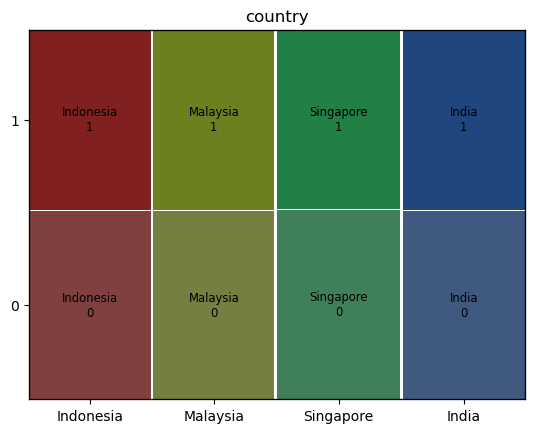

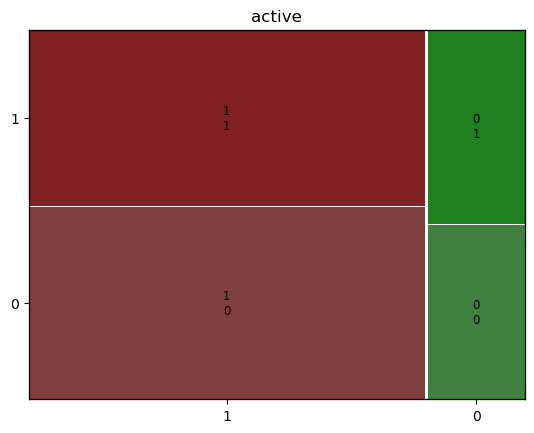

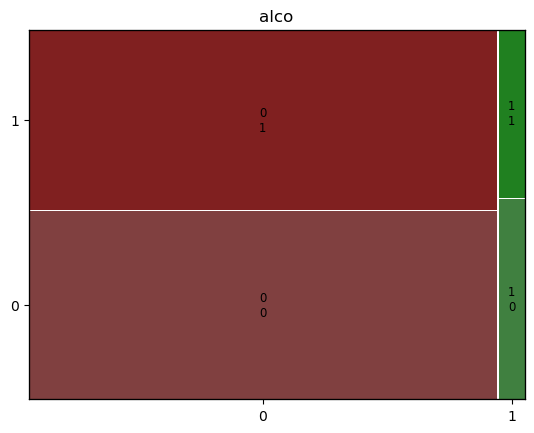

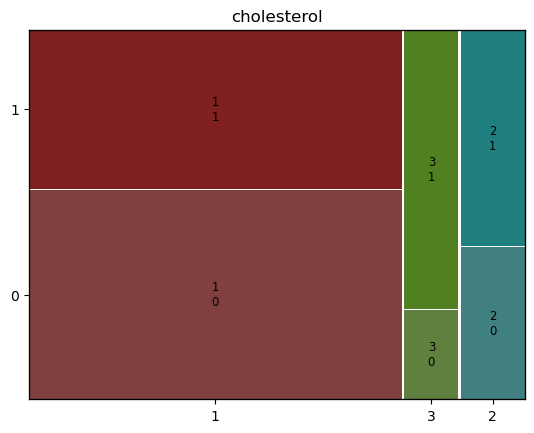

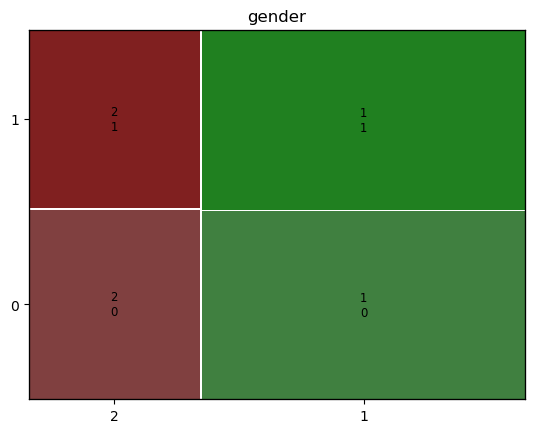

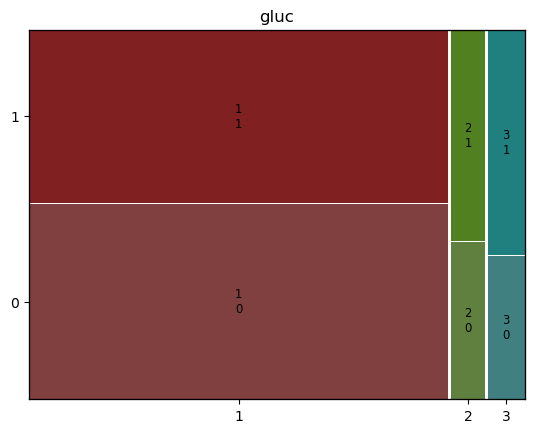

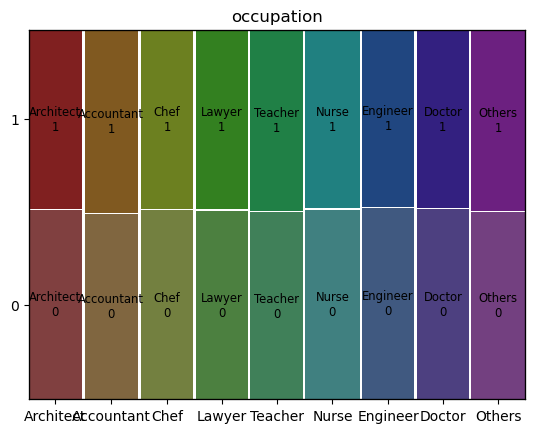

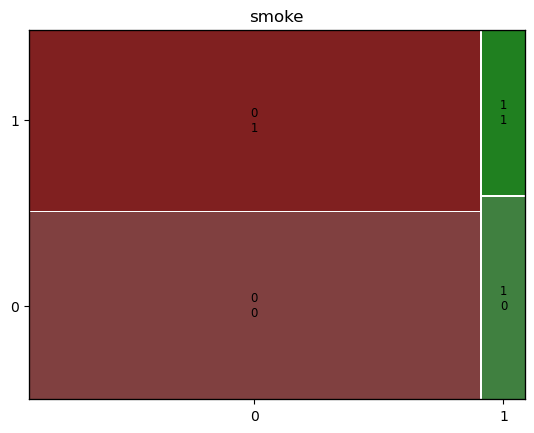

In [32]:
cardio_allcat = ['country', 'active', 'alco', 'cholesterol','gender', 'gluc', 'occupation', 'smoke']
for cat in cardio_allcat:
    mosaic(cardio, [cat, 'disease'])
    plt.title(cat)
plt.show()


<font color="blue">From above chart, we can see 'cholesterol','gluc', 'active', 'alco' and 'smoke' shows apparent percentage difference of disease in different categories of the feature.

<font color="blue">While 'country','gender', and 'occupation' do not give a clear difference.

<font color="blue">We will use chi-square test to check if each feature is related to our target (significance level at 0.05.)

In [33]:
from scipy.stats import chi2_contingency

results_df = pd.DataFrame(columns=['Feature','P-value','There is significant association'])

for cat in cardio_allcat:
    cat_table = pd.crosstab(cardio[cat], cardio['disease'])
    # Perform the chi-square test for Feature1
    chi2_stat, p_value, dof, expected = chi2_contingency(cat_table)
    if p_value > 0.05:
        conclusion = 'no'
    else:
        conclusion = 'yes'
    results_df = pd.concat([results_df,pd.DataFrame({'Feature':[cat],'P-value':[p_value],'There is significant association':[conclusion]})],ignore_index=True)
display(results_df)

,Feature,P-value,There is significant association
0,country,9.157358e-01,no
1,active,3.493301e-21,yes
2,alco,3.228307e-04,yes
3,cholesterol,0.000000e+00,yes
4,gender,2.398240e-01,no
5,gluc,4.893575e-100,yes
6,occupation,7.169954e-01,no
7,smoke,9.496296e-09,yes


<font color="blue">The results given by chi-square test agrees with what we observed from mosaic charts. We can proceed removing those non related features to our target.

In [34]:
cardio = cardio.drop(['country','gender','occupation'],axis=1)
cardio.head(2)

,id,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group
0,0,1,0,1,1,0,0,1,2,1,4
1,1,1,0,3,1,0,1,2,4,3,5


<font color="blue">We will also remove 'id' column as it has no use in building models.

In [35]:
cardio = cardio.drop(['id'],axis=1)
cardio.head(5)

,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group
0,1,0,1,1,0,0,1,2,1,4
1,1,0,3,1,0,1,2,4,3,5
2,0,0,3,1,0,1,3,2,1,4
3,1,0,1,1,0,1,2,5,2,3
4,0,0,1,1,0,0,2,0,1,3


<font color="blue">We will convert categorical labels into numerical labels, which can then be used as input for various machine learning algorithms including neural networks.

# 4. Clustering

<font color="blue">In addition to improve accuracy, we will introduce new feature by using Clustering technique in data preprocessing. 

<font color="blue">For categorical data, we will use 
KMode thats is a clustering algorithm used for clustering categorical data. Unlike traditional clustering algorithms like KMeans that work with numerical data, KModes is designed to handle categorical variables directly. It is based on the k-modes algorithm, which aims to partition the data into clusters of similar items where the similarity is measured by the number of matching categories between data points.

In [36]:
from kmodes.kmodes import KModes

In [37]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(cardio)
    cost.append(kmode.cost_)

To find the optimal number of clusters, elbow curve method will be used.

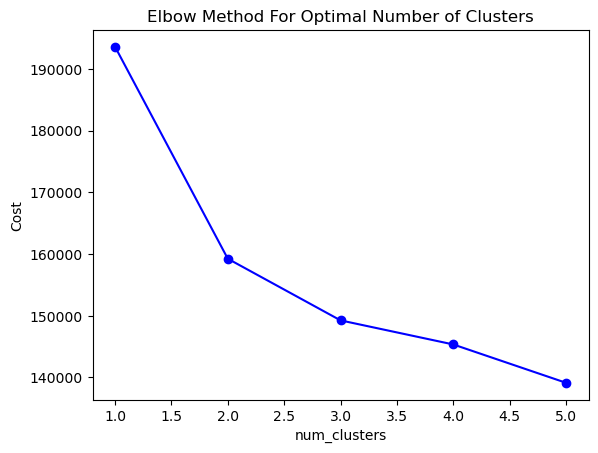

In [38]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [39]:
#Building KModes model
km = KModes(n_clusters=5, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(cardio)
clusters

array([4, 2, 0, ..., 1, 0, 1], dtype=uint16)

In [40]:
# Adding Clusters feature in data
cardio.insert(0,"clusters",clusters,True)

cardio.head()

,clusters,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group
0,4,1,0,1,1,0,0,1,2,1,4
1,2,1,0,3,1,0,1,2,4,3,5
2,0,0,0,3,1,0,1,3,2,1,4
3,0,1,0,1,1,0,1,2,5,2,3
4,3,0,0,1,1,0,0,2,0,1,3


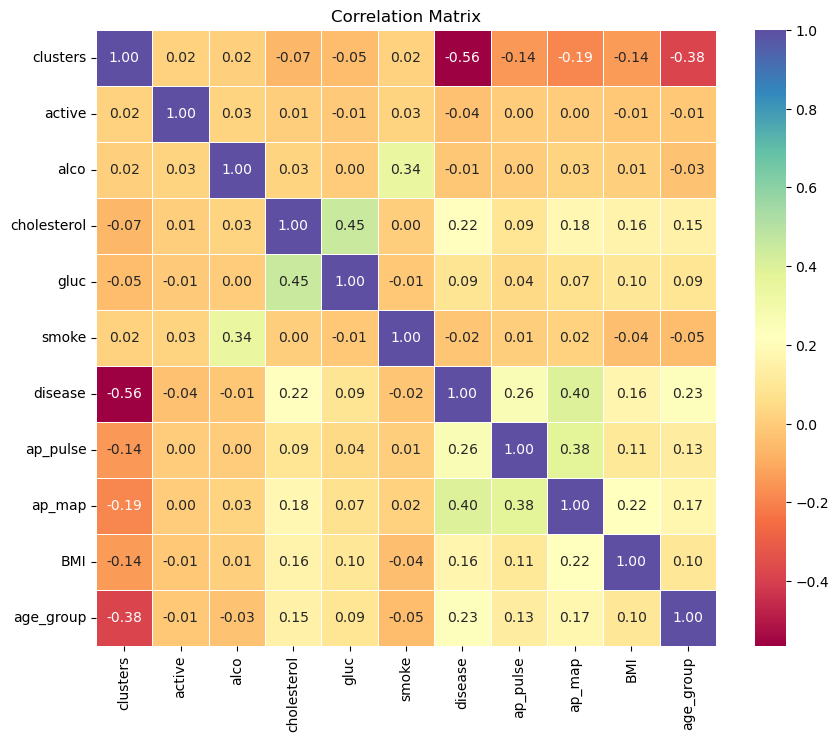

In [41]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(cardio.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

# 5. Label Encoder

We will convert categorical labels into numerical labels, which can then be used as input for various machine learning algorithms including neural networks.

In [42]:
from sklearn import preprocessing

In [43]:
le = preprocessing.LabelEncoder()
cardio = cardio.apply(le.fit_transform)
cardio.describe()

,clusters,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,1.206727,0.803648,0.051877,0.350953,0.220229,0.085631,0.488228,2.109774,2.359449,1.673440,4.154950
std,1.319402,0.397241,0.221781,0.670076,0.567607,0.279820,0.499866,0.595836,1.186906,0.898707,1.358693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,3.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,2.000000,5.000000
max,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,5.000000,5.000000,5.000000,6.000000


# 6. Saving Final Dataset

In [44]:
cardio.shape

(60142, 11)

<font color="blue">Our final dataset would have 60142 rows and 11 columns.

In [47]:
cardio.head(1)

,clusters,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group
0,4,1,0,0,0,0,0,1,2,1,4


In [45]:
cardio.to_csv('cardio_cleaned_Cluster.csv', index=False) #saving cleaned dataset for model building